In [5]:
## imports
import numpy as np
from matplotlib import pyplot as plt
from struct import unpack
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from scipy.stats import norm
from scipy.optimize import curve_fit
from astropy import modeling
import os
import glob
import time
# enables interactive widgets
%matplotlib widget

In [3]:
## Give path to multiple files
# Beware that all the files will be loaded to memory with this script
lines_of_data = 32

path = "C:/Users/jakub/Documents/LinoSpad2/data/AR_lamp/221024_filter_795_pix_155_pix_175_32_samples"

os.chdir(path)
DATA_FILES = glob.glob("*.dat*")


In [6]:
 ## Load data set
data_matrix = []
st = time.time()

for num,filename in enumerate(DATA_FILES):
    print(filename)

    rawFile = np.fromfile(filename, dtype=np.uint32)  # read data 
    data = (rawFile & 0xFFFFFFF).astype(int)*17.857 # Multiply with the lowes bin
    data[np.where(rawFile < 0x80000000)] = -1 # Mask not valid data 
    nmrCycles = int(len(data) / lines_of_data / 256)  # number of cycles,
    data_matrix_onefile = data.reshape((lines_of_data,nmrCycles*256), order='F').reshape((lines_of_data, 256,-1),order='F').transpose((0,2,1)).reshape((-1, 256),order='F').transpose() # reshape the matrix
   
    if not np.any(data_matrix):
        data_matrix = data_matrix_onefile
    else:
        data_matrix = np.append(data_matrix, data_matrix_onefile,axis=1)
        
et = time.time()
print('Execution time:', et - st, 'seconds')

test0000000001.dat
test0000000002.dat
test0000000003.dat
test0000000004.dat
test0000000005.dat
test0000000006.dat
test0000000007.dat
test0000000008.dat
test0000000009.dat
test0000000010.dat
test0000000011.dat
test0000000012.dat
test0000000013.dat
test0000000014.dat
test0000000015.dat
test0000000016.dat
test0000000017.dat
test0000000018.dat
test0000000019.dat
test0000000020.dat
test0000000021.dat
test0000000022.dat
test0000000023.dat
test0000000024.dat
test0000000025.dat
test0000000026.dat
test0000000027.dat
test0000000028.dat
test0000000029.dat
test0000000030.dat
test0000000031.dat
test0000000032.dat
test0000000033.dat
test0000000034.dat
test0000000035.dat
test0000000036.dat
test0000000037.dat
test0000000038.dat
test0000000039.dat
test0000000040.dat
test0000000041.dat
test0000000042.dat
test0000000043.dat
test0000000044.dat
test0000000045.dat
test0000000046.dat
test0000000047.dat
test0000000048.dat
test0000000049.dat
test0000000050.dat
test0000000051.dat
test0000000052.dat
test00000000

KeyboardInterrupt: 

In [8]:
print(data_matrix.shape)

(256, 6944000)


In [ ]:
## Shows distribution of timestamps of one pixel 

pixel_nmr = 134
fig, ax = plt.subplots(1, 1, figsize=(10, 7), tight_layout=True)
bins = np.arange(0, 4e9, 17.867 * 1e6)


ax.tick_params(which="both", width=2, direction="in")
ax.tick_params(which="major", length=7, direction="in")
ax.tick_params(which="minor", length=4, direction="in")
ax.yaxis.set_ticks_position("both")
ax.xaxis.set_ticks_position("both")
ax.set_xlabel("Time [ps]")
ax.set_ylabel("Valid timestamps [-]")
ax.set_title("Histogram of timestamps of pixel {}".format(pixel_nmr))
for axis in ["top", "bottom", "left", "right"]:
    ax.spines[axis].set_linewidth(2)
ax.hist(data_matrix[pixel_nmr], bins=bins)
ax.set_xlim(0, 4e9)
plt.show()    

Positions of pixels over 25k: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 21

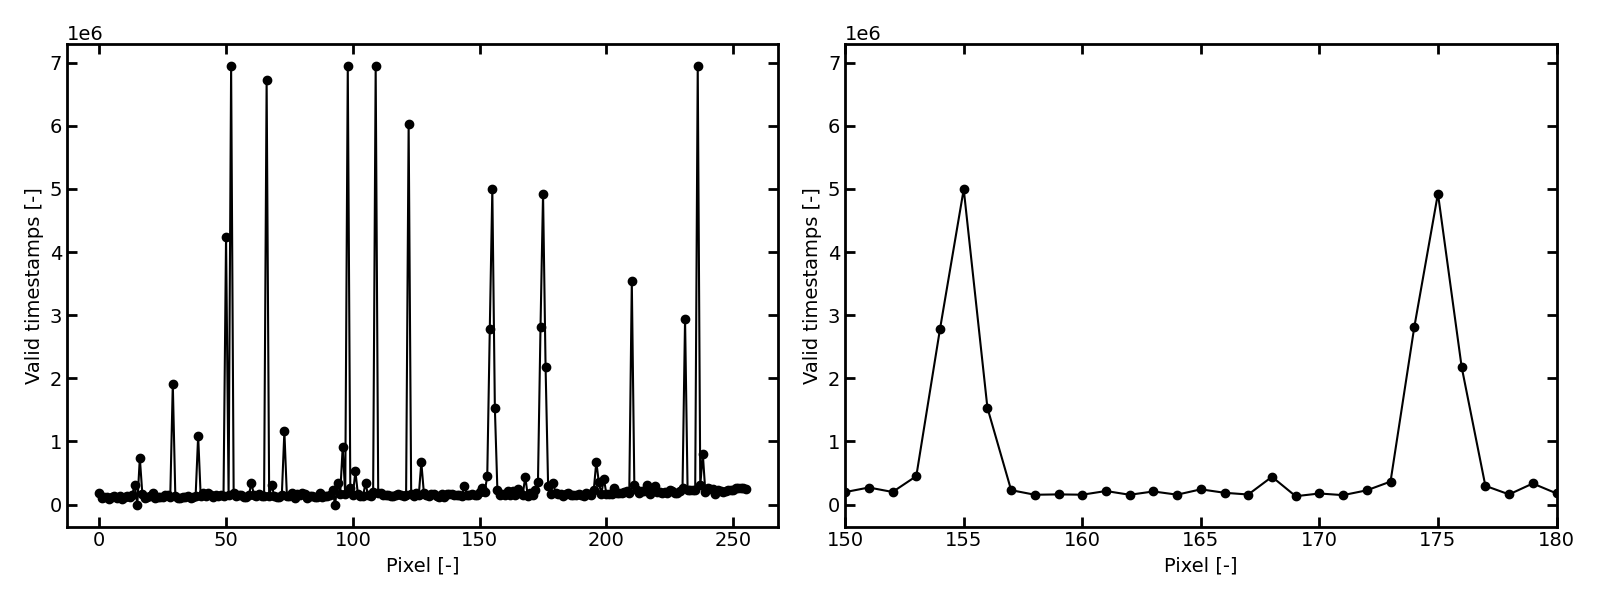

In [13]:
## Compute histogram of valid time stamps per pixel
# Masking out pixels 15 and 93

validPerPixel = np.zeros(256)
maskValidPixels = np.ones(256)

maskValidPixels[15] = 0
maskValidPixels[93] = 0

for j in range(len(data_matrix)):
    validPerPixel[j] = len(np.where(data_matrix[j] > 0)[0])

timestampHist = maskValidPixels*validPerPixel

fig, ax = plt.subplots(1,2)

plt.rcParams.update({"font.size": 18})
x = np.arange(0, 256, 1)

plt.xlabel("Pixel [-]")
plt.ylabel("Valid timestamps [-]")

plt.box(bool(1))
plt.grid(False)
plt.subplots_adjust(left=0.15)
fig.set_size_inches(16, 6)

for i in range(2):
    ax[i].tick_params(which="both", width=2, direction="in")
    ax[i].tick_params(which="major", length=7, direction="in")
    ax[i].tick_params(which="minor", length=4, direction="in")
    ax[i].yaxis.set_ticks_position("both")
    ax[i].xaxis.set_ticks_position("both")
    ax[i].set_xlabel("Pixel [-]")
    ax[i].set_ylabel("Valid timestamps [-]")

for axis in ["top", "bottom", "left", "right"]:
    ax[0].spines[axis].set_linewidth(2)
    ax[1].spines[axis].set_linewidth(2)
    
ax[0].plot(x, timestampHist,'-ok');
ax[1].plot(x, timestampHist,'-ok');

ax[1].set_xlim(150, 180)

fig.tight_layout(pad=1.0)


print("Positions of pixels over 25k: " + str([i for i,v in enumerate(timestampHist) if v > 25000]))


In [9]:
## Compute delta t for two pixels 
# First peak 133 134 135
# Second peak 142 143 144

p0 = 155
p1 = 175

pixel_0 = data_matrix[p0]
pixel_1 = data_matrix[p1]

timewindow = 50000
timestampsnmr = lines_of_data
nmr_of_cycles = int(len(pixel_0) / timestampsnmr)
delta_t = []

# start = time.time()
for cycle in range(nmr_of_cycles):
    for timestamp_pix0 in range(timestampsnmr):
        pix_0 = pixel_0[cycle * timestampsnmr + timestamp_pix0]
        if pix_0 == -1:
            break
        for timestamp_pix1 in range(timestampsnmr):
            pix_1=pixel_1[cycle * timestampsnmr + timestamp_pix1] 
            if pix_1 == -1 or pix_1 == 0:
                break
            if np.abs(pix_0 - pix_1) < timewindow:
                delta_t.append(pix_0 - pix_1)
            else:
                continue

NMR of coincidences in window: 4143


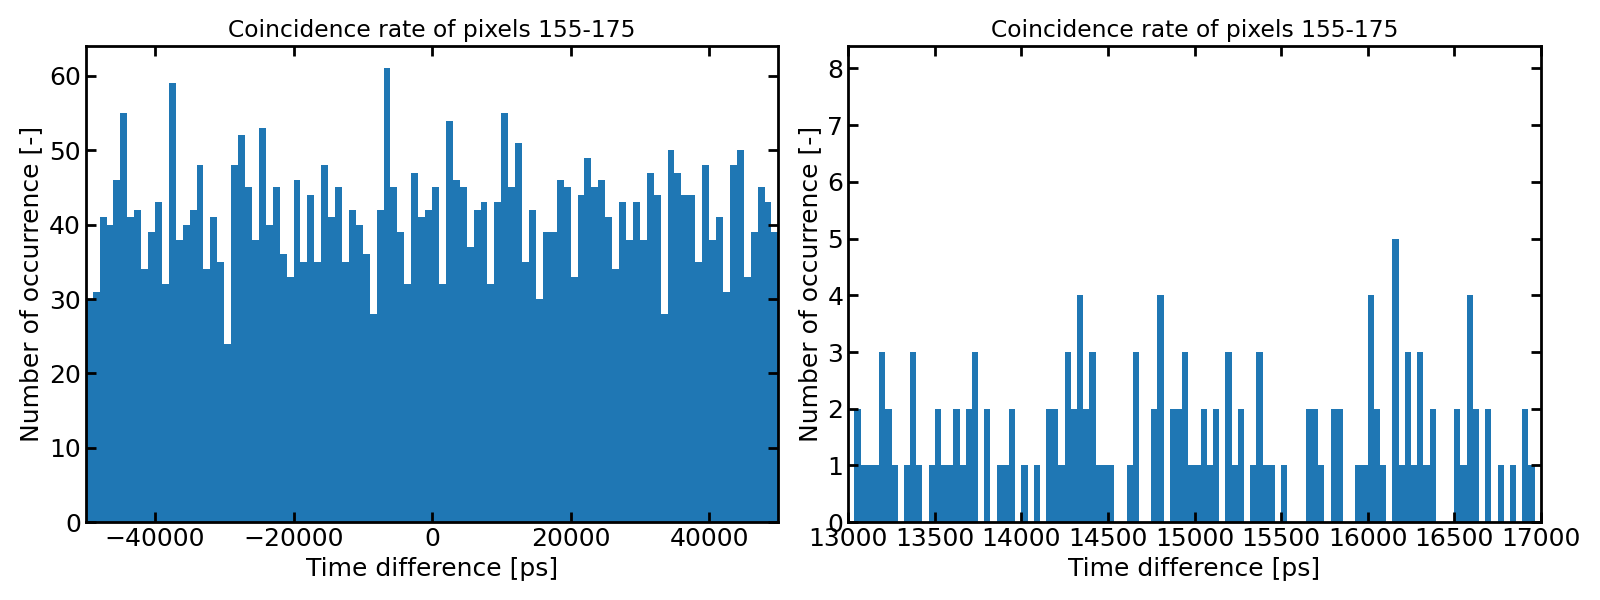

In [14]:
## Plot delta_t of multiple pixels and 

fig, ax = plt.subplots(1,2)

plt.rcParams.update({"font.size": 14})
x = np.arange(0, 256, 1)

plt.xlabel("Pixel [-]")
plt.ylabel("Valid timestamps [-]")

plt.box(bool(1))
plt.grid(False)
plt.subplots_adjust(left=0.15)
fig.set_size_inches(16, 6)

for i in range(2):
    ax[i].tick_params(which="both", width=2, direction="in")
    ax[i].tick_params(which="major", length=7, direction="in")
    ax[i].tick_params(which="minor", length=4, direction="in")
    ax[i].yaxis.set_ticks_position("both")
    ax[i].xaxis.set_ticks_position("both")
    ax[i].set_xlabel("Time difference [ps]")
    ax[i].set_ylabel("Number of occurrence [-]")
    ax[i].set_title("Coincidence rate of pixels {}-{}".format(p0,p1))
    
for axis in ["top", "bottom", "left", "right"]:
    ax[0].spines[axis].set_linewidth(2)
    ax[1].spines[axis].set_linewidth(2)

bins = np.arange(np.min(delta_t), np.max(delta_t), 17.857*2)#17.857) #
# bins = 100
bins2 = np.arange(np.min(delta_t), np.max(delta_t), 50 )
ax[0].hist(delta_t, bins=100)
ax[1].hist(delta_t, bins=bins)
ax[0].set_xlim(-timewindow, timewindow)
ax[1].set_xlim(13000, 17000)

fig.tight_layout(pad=1.0)

print("NMR of coincidences in window: " + str(len(delta_t)))

In [ ]:
## Fit coincidence rate with gaussian 


bins = np.arange(np.min(delta_t), np.max(delta_t), 17.857 )

counts, binEdges=np.histogram(delta_t,bins=bins)
binCenters = 0.5*(binEdges[1:]+binEdges[:-1])

def gauss(x, A, x0, sigma):
    return A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

n_max = np.argmax(counts)
arg_max = (binEdges[n_max] + binEdges[n_max + 1]) / 2
sigma = 200

parameters, covariance = curve_fit(gauss, binCenters, counts,p0=[max(counts), arg_max, sigma])

fit_y = gauss(binCenters, parameters[0], parameters[1], parameters[2])

## Plots
fig, ax = plt.subplots(1, 1, figsize=(8, 6), tight_layout=True)
ax.tick_params(which="both", width=2, direction="in")
ax.tick_params(which="major", length=7, direction="in")
ax.tick_params(which="minor", length=4, direction="in")
ax.yaxis.set_ticks_position("both")
ax.xaxis.set_ticks_position("both")
ax.set_xlabel("Time difference [ps]")
ax.set_ylabel("Number of occurrence [-]")
ax.set_title("Coincidence rate of pixels {}-{}".format(p0,p1))
for axis in ["top", "bottom", "left", "right"]:
    ax.spines[axis].set_linewidth(2)
plt.xlim(24000, 26000)
ax.plot(binCenters, counts, 'ro', label='data')
ax.plot(binCenters, fit_y, 'b-', label="Gaussian fit \nmean {} ps\nstd {} ps".format(int(np.round(parameters[1])),int(np.round(parameters[2]))))
ax.legend()

print("The sum under the peak is " + str(np.sum(counts[n_max-6:n_max+6])))


In [5]:
## Compute delta_t fot all combinations between pixels from two peaks two and concatenate them in delta_t_common
timewindow = 50000

# location of two peaks
pixel_array_0 = (154,155,156)
pixel_array_1 = (174,175,176)

timestampsnmr = lines_of_data
nmr_of_cycles = int(len(data_matrix[pixel_array_0[0]]) / timestampsnmr)

delta_t_common = []
delta_t = []

# Loop over pixels from first peak
for pix_peak0 in pixel_array_0:
    pixel_0 = data_matrix[pix_peak0]
    
    # Loop over pixels from second peak
    for pix_peak1 in pixel_array_1:
        pixel_1 = data_matrix[pix_peak1]
        
        # Compute delta_t between pixels
        for cycle in range(nmr_of_cycles):
            for timestamp_pix0 in range(timestampsnmr):
                if pixel_0[cycle * timestampsnmr + timestamp_pix0] == -1 or pixel_0[
                    cycle * timestampsnmr + timestamp_pix0] <= 1e-9:
                    break
                for timestamp_pix1 in range(timestampsnmr):
                    if pixel_1[cycle * timestampsnmr + timestamp_pix1] == -1 or pixel_1[
                        cycle * timestampsnmr + timestamp_pix1] == 0:
                        break
                    if np.abs(pixel_0[cycle * timestampsnmr + timestamp_pix0] - pixel_1[
                        cycle * timestampsnmr + timestamp_pix1]) < timewindow:
                        delta_t.append(pixel_0[cycle * timestampsnmr + timestamp_pix0] - pixel_1[
                            cycle * timestampsnmr + timestamp_pix1])
                    else:
                        continue

        delta_t_common= np.append(delta_t_common, delta_t)

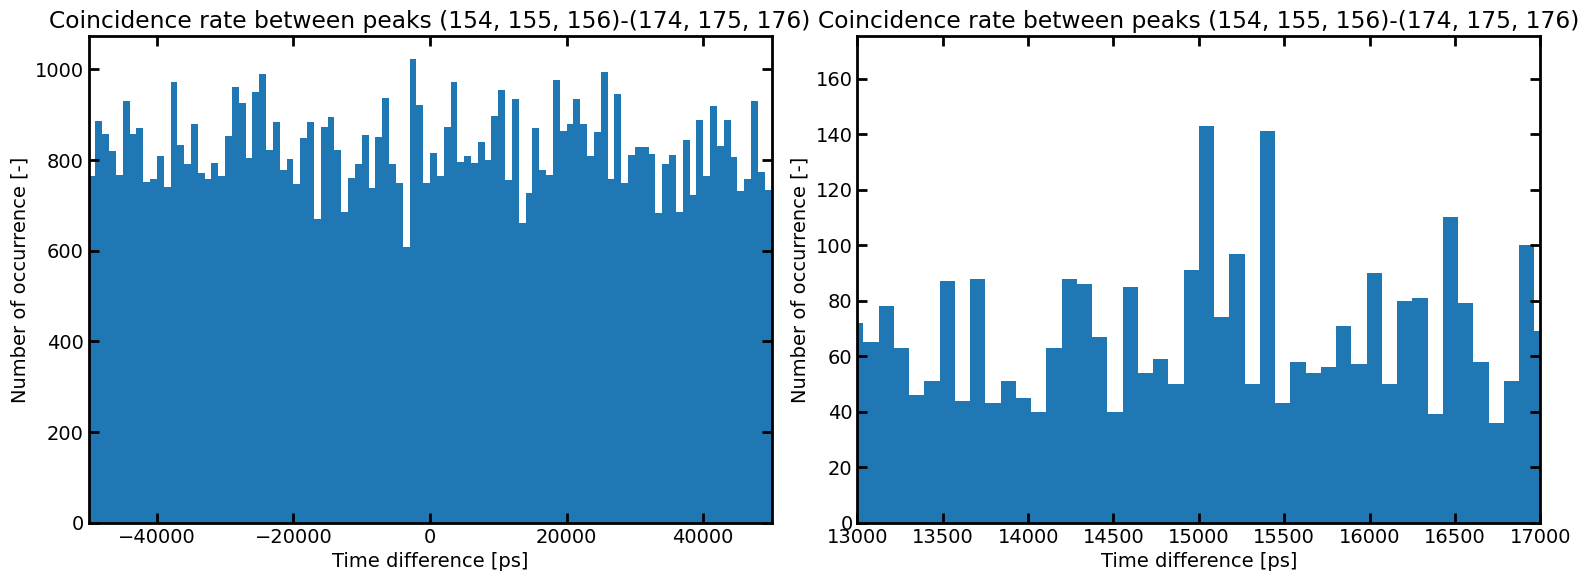

In [11]:
## Plot delta_t of multiple pixels and 

fig, ax = plt.subplots(1,2)

plt.rcParams.update({"font.size": 14})
x = np.arange(0, 256, 1)

plt.xlabel("Pixel [-]")
plt.ylabel("Valid timestamps [-]")

plt.box(bool(1))
plt.grid(False)
plt.subplots_adjust(left=0.15)
fig.set_size_inches(16, 6)

for i in range(2):
    ax[i].tick_params(which="both", width=2, direction="in")
    ax[i].tick_params(which="major", length=7, direction="in")
    ax[i].tick_params(which="minor", length=4, direction="in")
    ax[i].yaxis.set_ticks_position("both")
    ax[i].xaxis.set_ticks_position("both")
    ax[i].set_xlabel("Time difference [ps]")
    ax[i].set_ylabel("Number of occurrence [-]")
    ax[i].set_title("Coincidence rate between peaks {}-{}".format(pixel_array_0,pixel_array_1))
    
for axis in ["top", "bottom", "left", "right"]:
    ax[0].spines[axis].set_linewidth(2)
    ax[1].spines[axis].set_linewidth(2)

bins = np.arange(np.min(delta_t_common), np.max(delta_t_common), 17.857*5 )
bins2 = np.arange(np.min(delta_t_common), np.max(delta_t_common), 100 )
ax[0].hist(delta_t_common, bins=100)
ax[1].hist(delta_t_common, bins=bins)
ax[0].set_xlim(-timewindow, timewindow)
ax[1].set_xlim(13000, 17000)

fig.tight_layout(pad=1.0)